In [52]:
import party_information
import font_management
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np

In [3]:
df = pd.DataFrame(party_information.party_results_sc).T
df

,name,seats_result,seats_delta,seats_power,normalised_parliamentary_power_sc,group
1,FDP.Die Liberalen,11,-1,0.23913,0.119565,conservative
4,Schweizerische Volkspartei,6,-1,0.130435,0.065217,conservative
34,Die Mitte,15,1,0.326087,0.163043,middle
31,Grünliberale Partei,1,1,0.021739,0.01087,middle
3,Sozialdemokratische Partei der Schweiz,9,2,0.195652,0.097826,left
13,GRÜNE Schweiz,3,-2,0.065217,0.032609,left
33,Mouvement Citoyens Romands,1,1,0.021739,0.01087,conservative


In [4]:
grouped_results = df.groupby('group')['seats_result'].sum()
total_votes = grouped_results.sum()
grouped_results[''] = total_votes / 1.25
grouped_data = grouped_results.reindex(["conservative", "middle", "left", ''])
grouped_results

group
conservative      18
left              12
middle            16
                36.8
Name: seats_result, dtype: object

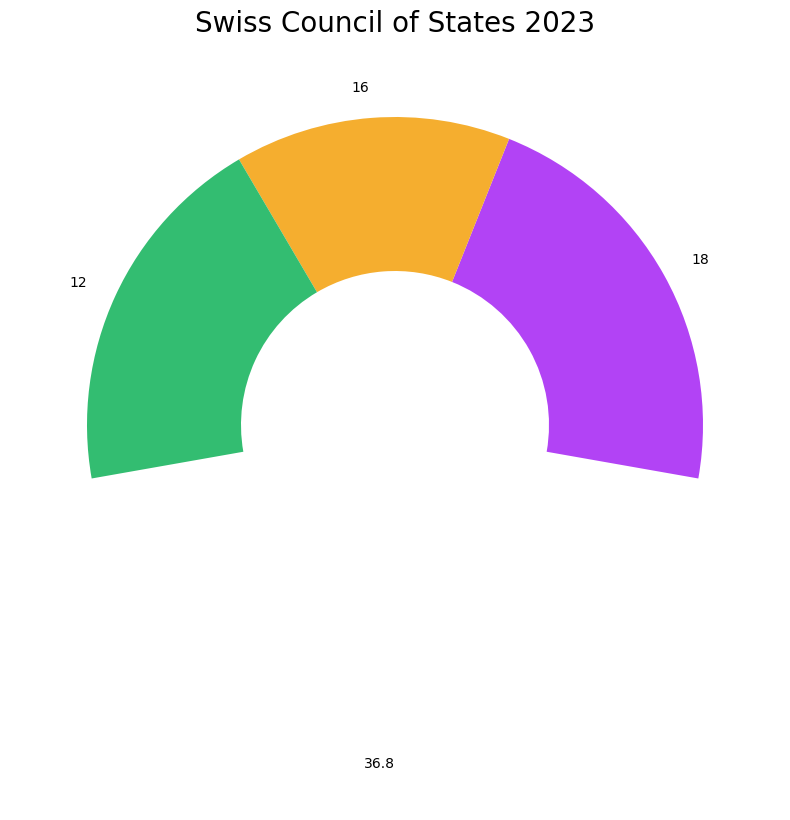

In [5]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Swiss Council of States 2023', fontsize=20)
wedges, texts = ax.pie(grouped_results, labels=grouped_data,wedgeprops=dict(width=0.5), startangle=-10, colors=[party_information.COLOR_DICT[key] for key in grouped_data.index])

In [6]:
df_nc = pd.DataFrame(party_information.party_results_nc).T
df_nc

,name,vote_result,vote_delta,seats_result,seats_delta,seats_power,seats_power_delta,normalised_parliamentary_power_nc,group
1,FDP.Die Liberalen,14.251527,-0.858771,28,-1,0.14,-0.005,0.07,conservative
3,Sozialdemokratische Partei der Schweiz,18.270387,1.434974,41,2,0.205,0.01,0.1025,left
4,Schweizerische Volkspartei,27.930159,2.340908,62,9,0.31,0.045,0.155,conservative
7,Evangelische Volkspartei der Schweiz,1.950625,-0.124925,2,-1,0.01,-0.005,0.005,middle
8,Christlichsoziale Partei,0.093853,-0.163456,0,0,0.0,0.0,0.0,middle
9,Partei der Arbeit / Solidarität,0.721671,-0.327233,0,-2,0.0,-0.01,0.0,left
12,Grün-Alternative (inkl. POCH),0.170012,-0.147994,0,0,0.0,0.0,0.0,left
13,GRÜNE Schweiz,9.782473,-3.417309,23,-5,0.115,-0.025,0.0575,left
14,Schweizer Demokraten,0.079467,-0.052608,0,0,0.0,0.0,0.0,conservative
16,Eidgenössisch-Demokratische Union,1.233628,0.23756,2,1,0.01,0.005,0.005,conservative


In [7]:
grouped_results = df_nc[['name', 'normalised_parliamentary_power_nc', 'group']]
grouped_results = grouped_results.merge(df[['name', 'group', 'normalised_parliamentary_power_sc']], on='name')
grouped_results

,name,normalised_parliamentary_power_nc,group_x,group_y,normalised_parliamentary_power_sc
0,FDP.Die Liberalen,0.07,conservative,conservative,0.119565
1,Sozialdemokratische Partei der Schweiz,0.1025,left,left,0.097826
2,Schweizerische Volkspartei,0.155,conservative,conservative,0.065217
3,GRÜNE Schweiz,0.0575,left,left,0.032609
4,Grünliberale Partei,0.025,middle,middle,0.01087
5,Mouvement Citoyens Romands,0.005,conservative,conservative,0.01087
6,Die Mitte,0.0725,middle,middle,0.163043


In [8]:
chart_data = grouped_results.groupby('group_x').sum()[['normalised_parliamentary_power_nc', 'normalised_parliamentary_power_sc']]
chart_data

,normalised_parliamentary_power_nc,normalised_parliamentary_power_sc
group_x,,
conservative,0.23,0.195652
left,0.16,0.130435
middle,0.0975,0.173913


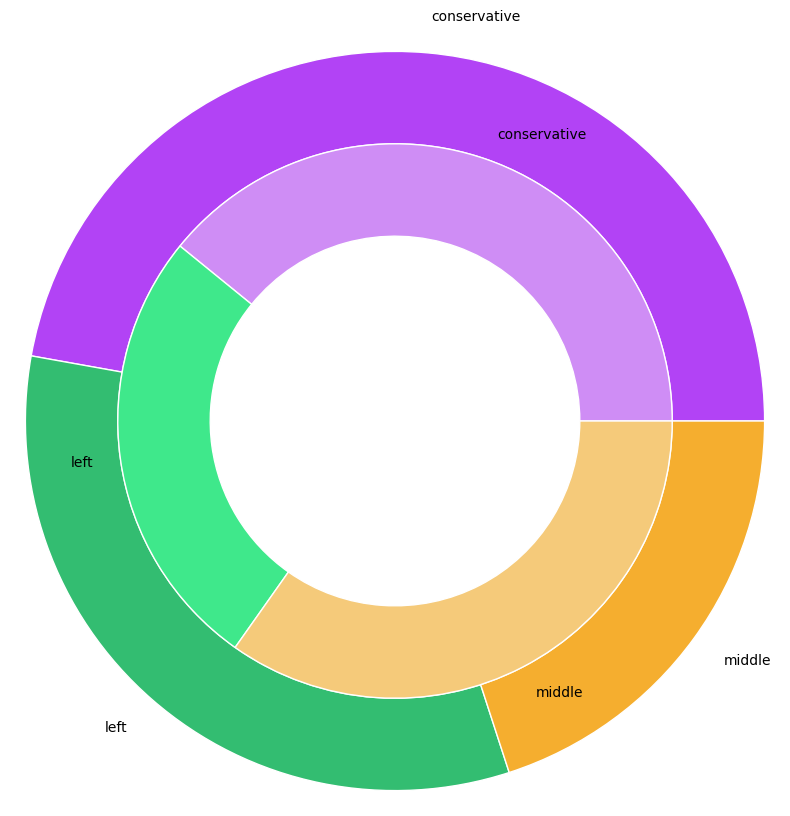

In [9]:
color_map = {'conservative': party_information.CONSERVATIVE_COLOR, 'middle': party_information.MIDDLE_COLOR, 'left': party_information.LEFT_COLOR}
shade_map = {'conservative': party_information.CONSERVATIVE_SHADE, 'middle': party_information.MIDDLE_SHADE, 'left': party_information.LEFT_SHADE}
chart_data['color'] = chart_data.index.map(color_map)
chart_data['shade'] = chart_data.index.map(shade_map)

# Creating the plot
fig, ax = plt.subplots(figsize=(10, 10))

# Plotting the "normalised_parliamentary_power_nc" (outer ring)
ax.pie(chart_data['normalised_parliamentary_power_nc'], labels=chart_data.index, colors=chart_data['color'], radius=1.2,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# Plotting the "normalised_parliamentary_power_sc" (inner ring)
ax.pie(chart_data['normalised_parliamentary_power_sc'], labels=chart_data.index, colors=chart_data['shade'], radius=0.9,
       wedgeprops=dict(width=0.3, edgecolor='w'))

# Display the plot
plt.show()

In [10]:
chart_data

,normalised_parliamentary_power_nc,normalised_parliamentary_power_sc,color,shade
group_x,,,,
conservative,0.23,0.195652,#B243F5,#CF8DF5
left,0.16,0.130435,#33BD71,#3FE88B
middle,0.0975,0.173913,#F5AE2F,#F5CA7A


In [11]:
clean_df = chart_data.reset_index()
clean_df

,group_x,normalised_parliamentary_power_nc,normalised_parliamentary_power_sc,color,shade
0,conservative,0.23,0.195652,#B243F5,#CF8DF5
1,left,0.16,0.130435,#33BD71,#3FE88B
2,middle,0.0975,0.173913,#F5AE2F,#F5CA7A


In [12]:
nc_values = clean_df.set_index('group_x')['normalised_parliamentary_power_nc']
nc_colors = clean_df.set_index('group_x')['color']
sc_values = clean_df.set_index('group_x')['normalised_parliamentary_power_sc']
sc_colors = clean_df.set_index('group_x')['shade']

# Concatenate the 'nc' and 'sc' values and colors into one series each, with appropriate multi-level indexing
combined_values = pd.concat([nc_values, sc_values], keys=['nc', 'sc'], names=['type', 'group']).sort_index(level='group')
combined_colors = pd.concat([nc_colors, sc_colors], keys=['nc', 'sc'], names=['type', 'group']).sort_index(level='group')

# Create a dataframe from the combined series
pivoted_df = pd.DataFrame({
       'value': combined_values.values,
       'color': combined_colors.values
}, index=combined_values.index).reset_index()

# Show the pivoted dataframe
#Reindex that the group order is conservative, middle, left
pivoted_df = pivoted_df.reindex([1, 0, 5, 4, 3, 2])
#Add an empty row at the end
new_row = pd.DataFrame({'group': [''], 'value': [pivoted_df['value'].sum()/1.25], 'color': [party_information.COLOR_DICT['']]})
pivoted_df = pd.concat([pivoted_df, new_row], ignore_index=True)
#Combine type and group columns to group
pivoted_df['name'] = np.where(pivoted_df['type'] == 'sc',
                              pivoted_df['group'] + ' states council',
                              pivoted_df['group'] + ' national council')
#Set the name of the empty row to ''
pivoted_df.loc[pivoted_df['group'] == '', 'name'] = ''
pivoted_df

,type,group,value,color,name
0,sc,conservative,0.195652,#CF8DF5,conservative states council
1,nc,conservative,0.23,#B243F5,conservative national council
2,sc,middle,0.173913,#F5CA7A,middle states council
3,nc,middle,0.0975,#F5AE2F,middle national council
4,sc,left,0.130435,#3FE88B,left states council
5,nc,left,0.16,#33BD71,left national council
6,NaN,,0.79,"(1, 1, 1, 0)",


In [13]:
sum_groups = pivoted_df.groupby('group').sum()
sum_groups = sum_groups.reindex(['conservative', 'middle', 'left', ''])
sum_groups

,type,value,color,name
group,,,,
conservative,scnc,0.425652,#CF8DF5#B243F5,conservative states councilconservative nation...
middle,scnc,0.271413,#F5CA7A#F5AE2F,middle states councilmiddle national council
left,scnc,0.290435,#3FE88B#33BD71,left states councilleft national council
,0,0.79,"(1, 1, 1, 0)",


Text(0.05, -0.05, "The accumulative percents are 98.7% as there were votes on minor parties which didn't receive a seat.")

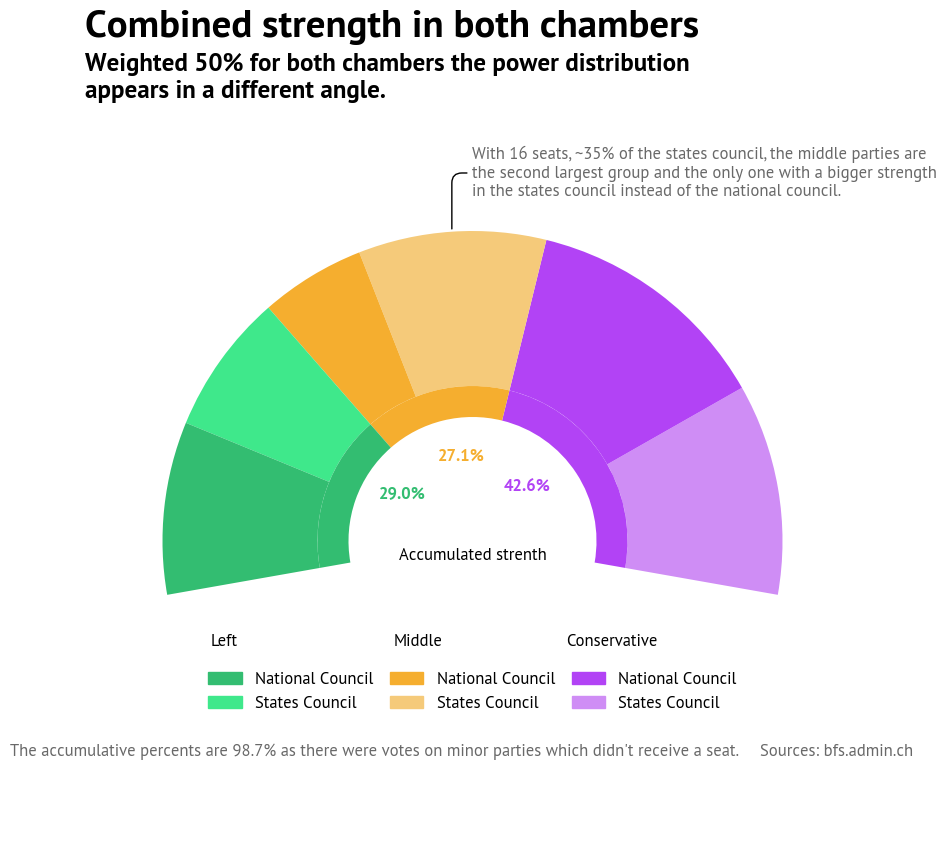

In [109]:
def format_label(pct):
    if pct != sum_groups.loc['', 'value']:
        return f'{pct:.1%}'
    else:
        return ''
fig, ax = plt.subplots(figsize=(10, 10))
ax.set_title('Combined strength in both chambers', fontdict=font_management.TITLE_FONT, loc='left', transform=ax.transAxes)
ax.text(s='Weighted 50% for both chambers the power distribution\nappears in a different angle.', x=0.00, y=0.83, fontdict=font_management.SUBTITLE_FONT, weight='bold', transform=ax.transAxes)
wedges, texts = ax.pie(pivoted_df['value'], radius=1, wedgeprops=dict(width=0.5), startangle=-10, colors=pivoted_df['color'])
wedges_inner, texts_inner = ax.pie(
    sum_groups['value'],
    radius=0.5,
    labels=[format_label(v) for v in sum_groups['value']],  # Use the custom label function
    wedgeprops=dict(width=0.1),
    startangle=-10,
    textprops=font_management.ANNOTATION_FONT,
    colors=[party_information.COLOR_DICT[key] for key in sum_groups.index]
)

# Adjust font size and color of labels
for text, color in zip(texts_inner, [party_information.COLOR_DICT[key] for key in sum_groups.index]):
    text.set_fontsize(12)
    text.set_color(color)
    text.set_fontweight('bold')

#Place the labels
texts_inner[0].set_position((0.1, 0.15))
texts_inner[1].set_position((0.04, 0.25))
texts_inner[2].set_position((-0.15, 0.13))
#Making the legend
valid_groups = pivoted_df['group'].unique()
# Creating legend entries for each combination, with a check for existence
legend_elements = []
for group in ['left', 'middle', 'conservative']:
    for council_type, label in [('nc', 'National Council'), ('sc', 'States Council')]:
        filtered_df = pivoted_df[(pivoted_df['group'] == group) & (pivoted_df['type'] == council_type)]
        if not filtered_df.empty:
            color = filtered_df['color'].iloc[0]
            legend_elements.append(mpatches.Patch(color=color, label=label))
legend = ax.legend(handles=legend_elements, ncol=3, bbox_to_anchor=(0.5, -1), loc="lower center", columnspacing=1, frameon=False, prop={'size': 12, 'family': 'PT Sans'})
for i, group in enumerate(['Left', 'Middle', 'Conservative']):
    ax.text(0.18 + 0.25 * i, -0.75, group, ha='center', va='center', transform=ax.transAxes, fontdict=font_management.ANNOTATION_FONT, color='black')
#Set an annotation for the middle party state council
for wedge, row in zip(wedges, pivoted_df.itertuples()):
    if row.group == 'middle' and row.type == 'sc':
        # Get the angle at which to place the annotation
        angle = (wedge.theta1 + wedge.theta2) / 2
        # Convert the angle to radians
        angle_rad = np.deg2rad(angle)

        # Position for the annotation point on the wedge
        x = np.cos(angle_rad) * 1
        y = np.sin(angle_rad) * 1

        # Position for the text
        xytext = (0, 1.1)  # Further out on the right side

        # Adding the annotation with a line that has an edge
        ax.annotate('With 16 seats, ~35% of the states council, the middle parties are\nthe second largest group and the only one with a bigger strength\nin the states council instead of the national council.', xy=(x, y), xytext=xytext,
                    arrowprops=dict(arrowstyle="-", connectionstyle="angle,angleA=0,angleB=90,rad=10"), **font_management.ANNOTATION_FONT)

        break

ax.set_ylim(0.5, 1.6)
ax.text(s='Accumulated strength', x=0.5, y=-0.5, ha='center', va='center', transform=ax.transAxes, fontdict=font_management.ANNOTATION_FONT, color='black')
fig.text(x=0.8, y=-0.05, s="Sources: bfs.admin.ch", fontdict=font_management.ANNOTATION_FONT)
fig.text(x=0.05, y=-0.05, s="The accumulative percents are 98.7% as there were votes on minor parties which didn't receive a seat.", fontdict=font_management.ANNOTATION_FONT)